In [1]:
!wget https://github.com/WiraDKP/unsupervised_learning/raw/master/18%20-%20Unsupervised%20Learning/02%20-%20Dimensionality%20Reduction/data.zip

--2023-11-04 10:41:50--  https://github.com/WiraDKP/unsupervised_learning/raw/master/18%20-%20Unsupervised%20Learning/02%20-%20Dimensionality%20Reduction/data.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/WiraDKP/unsupervised_learning/master/18%20-%20Unsupervised%20Learning/02%20-%20Dimensionality%20Reduction/data.zip [following]
--2023-11-04 10:41:50--  https://raw.githubusercontent.com/WiraDKP/unsupervised_learning/master/18%20-%20Unsupervised%20Learning/02%20-%20Dimensionality%20Reduction/data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24864134 (24M) [application/zip]
Saving to

In [2]:
!unzip data.zip

Archive:  data.zip
   creating: data/
  inflating: data/.DS_Store          
   creating: __MACOSX/
   creating: __MACOSX/data/
  inflating: __MACOSX/data/._.DS_Store  
  inflating: data/lfw_people.csv     
  inflating: data/small_fmnist.csv   
  inflating: data/breast_cancer.csv  
  inflating: data/kompas.csv         
  inflating: __MACOSX/data/._kompas.csv  
   creating: data/sample_faces/
  inflating: data/sample_faces/.DS_Store  
   creating: __MACOSX/data/sample_faces/
  inflating: __MACOSX/data/sample_faces/._.DS_Store  
  inflating: data/sample_faces/hatta.png  
  inflating: data/sample_faces/soekarno2.png  
  inflating: data/sample_faces/soekarno1.png  


In [15]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("/content/data/small_fmnist.csv")
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,164,177,163,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,40,...,125,93,87,49,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,154,118,66,0,0,0,0,0,0,0


In [10]:
label2cat = {
    0 : "T-shirt/top",
    1 : "Trouser",
    2 : "Pullover",
    3 : "Dress",
    4 : "Coat",
    5 : "Sandal",
    6 : "Shirt",
    7 : "Sneaker",
    8 : "Bag",
    9 : "Ankle boot"
}

In [11]:
X = df.drop(columns="label")
y = df.label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4000, 784), (1000, 784), (4000,), (1000,))

Visualization with tSNE

In [12]:
tsne = TSNE(2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train)

Text(0, 0.5, 'TSNE 2')

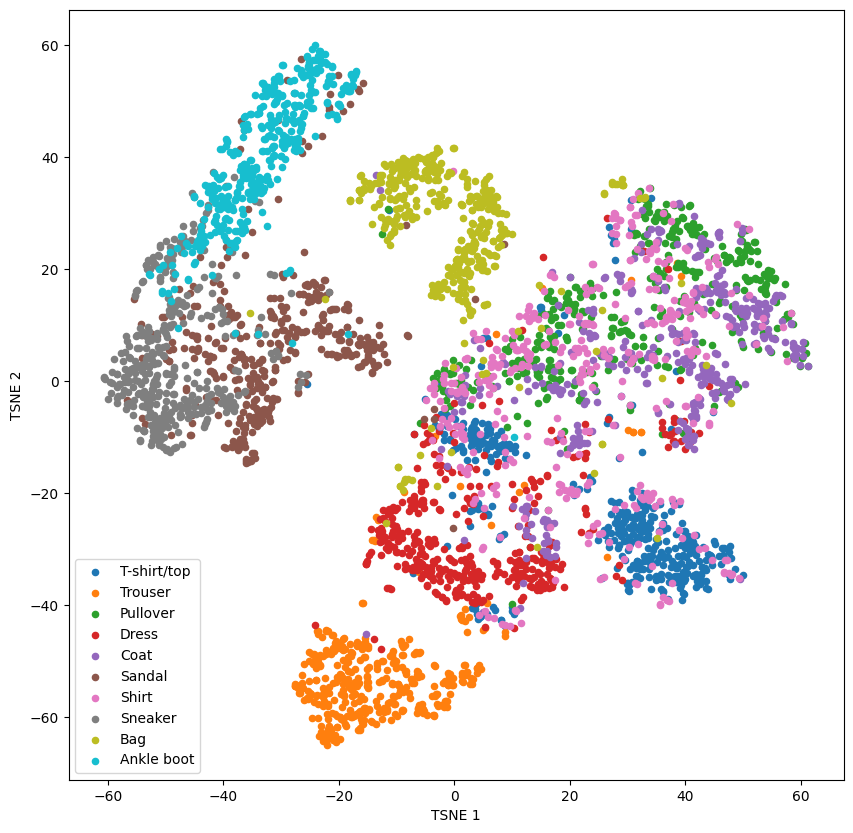

In [16]:
plt.figure(figsize=(10, 10))
for i in range(10):
    mask = y_train == i
    plt.scatter(X_train_tsne[mask, 0], X_train_tsne[mask, 1], s=20, label=label2cat[i])
plt.legend()
plt.xlabel("TSNE 1")
plt.ylabel("TSNE 2")

Visualization with PCA

Text(0, 0.5, 'PCA 2')

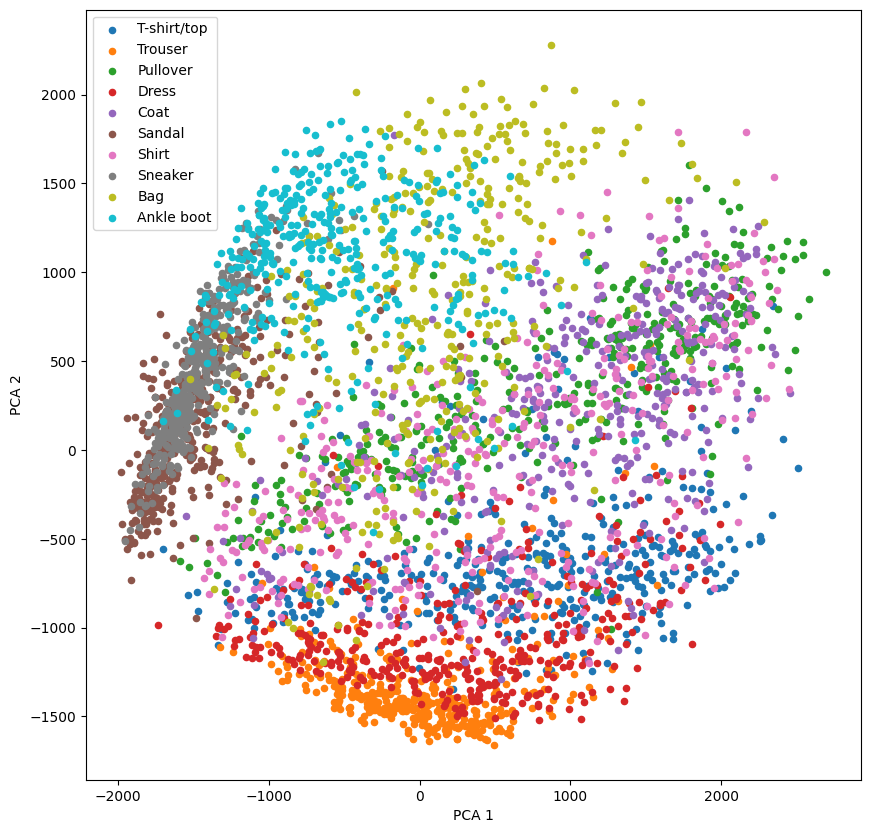

In [18]:
pca = PCA(2)
X_train_pca = pca.fit_transform(X_train)

plt.figure(figsize=(10, 10))
for i in range(10):
    mask = y_train == i
    plt.scatter(X_train_pca[mask, 0], X_train_pca[mask, 1], s=20, label=label2cat[i])
plt.legend()
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")